In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Taller 1/

/content/drive/MyDrive/Taller 1


In [4]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("listings.csv", sep=',')

In [5]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,116268,Double Room (Unavailable for check in 31Dec-1Jan),586671,Joe,NaN,Enfield,51.611370,-0.118880,Private room,40.0,7,38,2024-01-01,0.28,1,105,1,NaN
1,117203,A stylish Victorian home in West London,255103,Olga,NaN,Hammersmith and Fulham,51.501550,-0.233002,Entire home/apt,131.0,5,91,2024-06-09,0.59,1,33,10,NaN
2,127652,Contemporary central London apt,134938,Ron,NaN,Camden,51.559528,-0.144319,Entire home/apt,215.0,5,216,2024-07-09,1.35,1,134,5,NaN
3,127860,Double bedroom in cottage Twickenham (sleeps 1-2),161720,Andy,NaN,Richmond upon Thames,51.447770,-0.339620,Private room,NaN,2,0,NaN,NaN,1,0,0,NaN
4,131444,Apartment close to centre.,646165,Yevgeniy,NaN,Lambeth,51.491476,-0.111514,Entire home/apt,150.0,30,148,2024-06-15,0.93,2,6,12,NaN


In [6]:
# Showing dataframe dimensions
listings_df.shape

(96182, 18)

In [7]:
# Showing column types
listings_df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


# Entendimiento inicial de datos

Las 5 variables elegidas fueron las siguientes:

* **Neighbourhood (Vecindario)**: Este atributo describe la ubicación de la propiedad dentro de un vecindario específico. Es relevante para comprender la distribución geográfica de los alojamientos, así como posibles tendencias de precios y disponibilidad según la zona.

* **Room Type (Tipo de Habitación)**: Define si la propiedad es un apartamento completo, una habitación privada, etc. Este atributo es importante para segmentar las propiedades según el tipo de alojamiento que ofrecen, lo que afecta directamente al precio y la experiencia del huésped.

* **Minimum Nights (Noches Mínimas)**: El número mínimo de noches que un huésped debe reservar. Es un factor clave que influye en la accesibilidad de la propiedad, ya que aquellos que requieren estadías más cortas o más largas tendrán diferentes opciones.

* **Availability 365 (Disponibilidad)**: Indica cuántos días al año la propiedad está disponible para ser reservada. Este dato es útil para evaluar la capacidad de oferta de las propiedades y su potencial de rentabilidad.

* C**alculated Host Listings Count (Propiedades del Anfitrión)**: Representa el número de propiedades que un anfitrión tiene en total. Es un indicador importante del nivel de profesionalización del anfitrión y puede correlacionarse con la calidad del servicio o la experiencia del huésped.

En conclusión, este dataset contiene una combinación de variables categóricas, numéricas y geográficas que ofrecen una visión rica del mercado de alquileres de propiedades. Las columnas clave seleccionadas proporcionan información valiosa sobre la ubicación, tipo de propiedad, restricciones de reserva, y la oferta general de cada anfitrión.

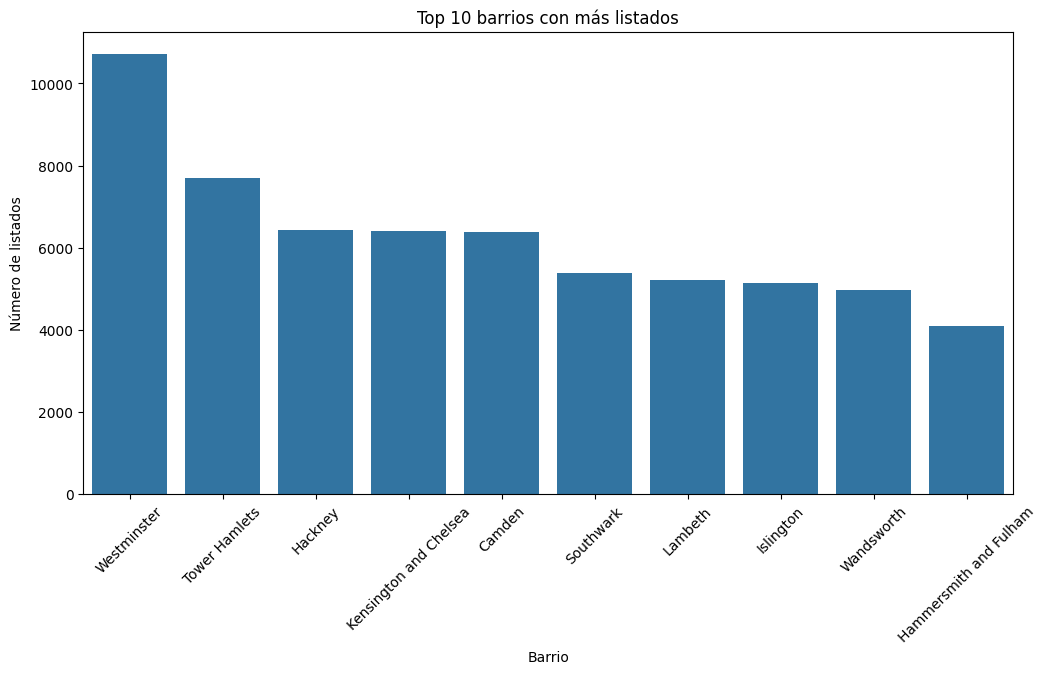

In [8]:
# Contar la frecuencia de cada barrio
neighbourhood_counts = listings_df['neighbourhood'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=neighbourhood_counts.head(10).index, y=neighbourhood_counts.head(10).values)
plt.title('Top 10 barrios con más listados')
plt.xticks(rotation=45)
plt.xlabel('Barrio')
plt.ylabel('Número de listados')
plt.show()

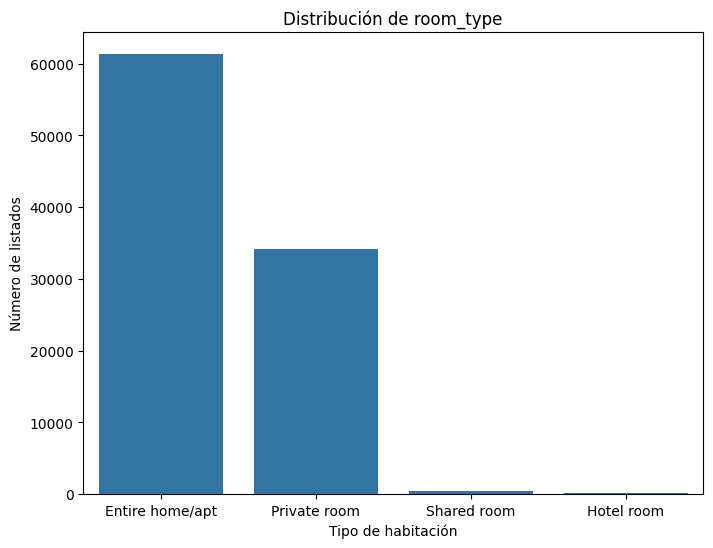

In [9]:
# Contar la frecuencia de cada tipo de habitación
room_type_counts = listings_df['room_type'].value_counts()

# Visualizar la distribución de tipos de habitación
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Distribución de room_type')
plt.xlabel('Tipo de habitación')
plt.ylabel('Número de listados')
plt.show()

In [10]:
print(listings_df['minimum_nights'].describe())

count    96182.000000
mean         5.438315
std         23.053614
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1125.000000
Name: minimum_nights, dtype: float64


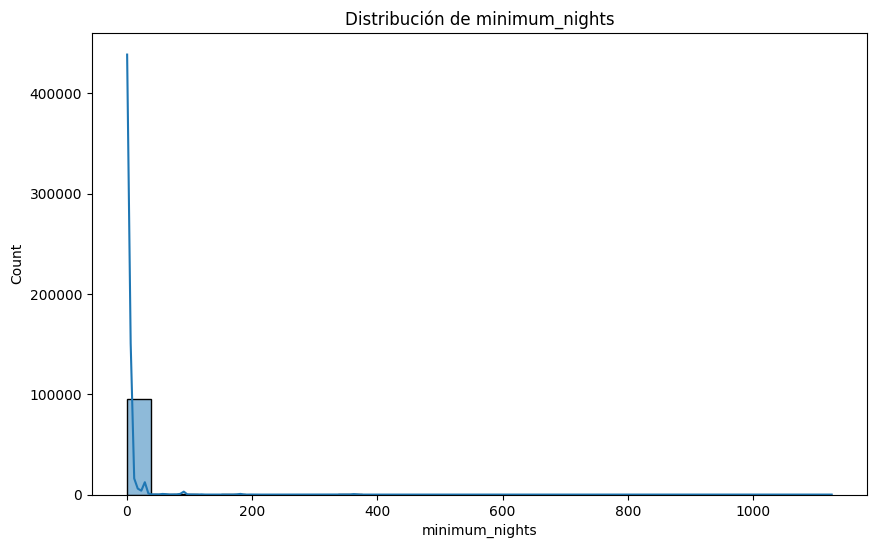

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['minimum_nights'], bins=30, kde=True)
plt.title('Distribución de minimum_nights')
plt.show()

In [12]:
print(listings_df['availability_365'].describe())

count    96182.000000
mean       132.112817
std        133.987287
min          0.000000
25%          0.000000
50%         88.000000
75%        263.000000
max        365.000000
Name: availability_365, dtype: float64


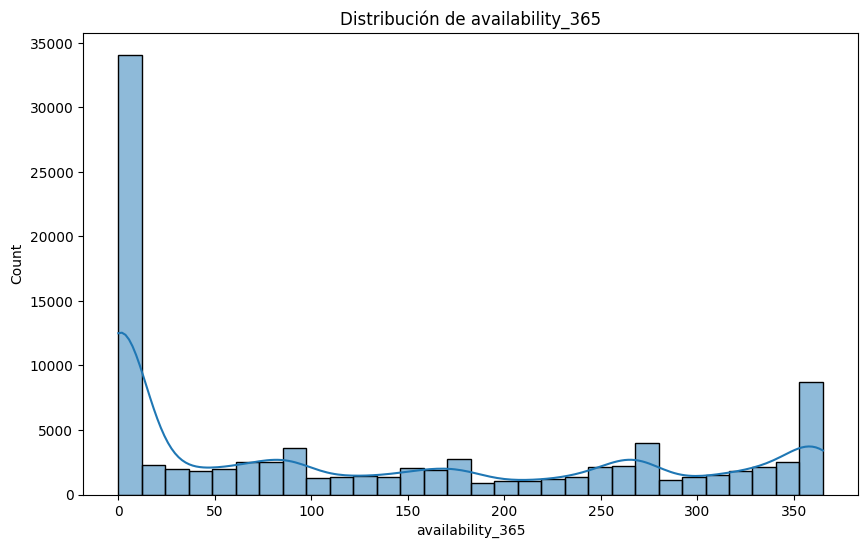

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['availability_365'], bins=30, kde=True)
plt.title('Distribución de availability_365')
plt.show()

In [14]:
print(listings_df['calculated_host_listings_count'].describe())

count    96182.000000
mean        15.478738
std         50.108297
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max        438.000000
Name: calculated_host_listings_count, dtype: float64


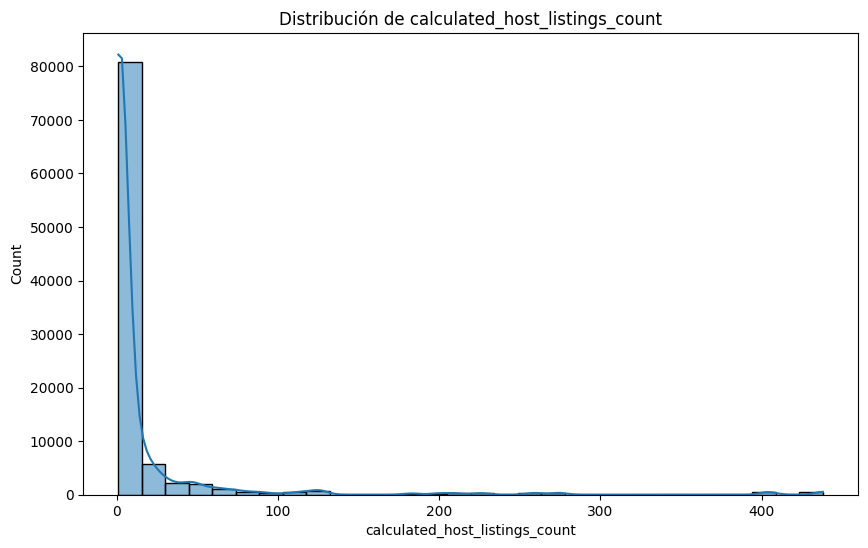

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['calculated_host_listings_count'], bins=30, kde=True)
plt.title('Distribución de calculated_host_listings_count')
plt.show()

# Estrategia de análisis

La estrategia que se adoptará en este análisis se centrará en la limpieza y preparación del conjunto de datos listings_df para garantizar resultados fiables. Primero, se realizará un conteo de los valores nulos en cada columna para identificar las áreas con datos faltantes.

A las variables que presenten valores atípicos se les asignará la mediana, ya que esta medida es menos susceptible a influencias extremas. Las columnas que contengan únicamente valores nulos se eliminarán del análisis, ya que no aportan información relevante.

Se convertirán las variables de fecha a un formato adecuado para facilitar el análisis temporal. Esta preparación será fundamental para asegurar que el análisis posterior se base en información confiable y significativa, maximizando así la validez de las conclusiones que se extraigan.

# Desarrollo de la estrategia


In [16]:
# Contar los valores nulos en cada columna
missing_values = listings_df.isnull().sum()

# Mostrar el conteo de valores nulos
print(missing_values)


id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group               96182
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             32977
minimum_nights                        0
number_of_reviews                     0
last_review                       24533
reviews_per_month                 24533
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           96182
dtype: int64


In [17]:
# Manejar los valores faltantes
listings_df.fillna({'price': listings_df['price'].median(), 'reviews_per_month': 0, 'last_review': 'No review', 'host_name ': 'No host name' }, inplace=True)

# Convertir columnas de fecha a datetime
listings_df['last_review'] = pd.to_datetime(listings_df['last_review'], errors='coerce')

In [18]:
# Revisar valores únicos de neighborhood_group y neighborhood
print(listings_df['neighbourhood_group'].unique())

# Eliminar la columna 'neighbourhood_group' ya que todos son NaN
listings_df.drop(columns=['neighbourhood_group'], inplace=True)

# Eliminar la columna 'License' ya que todos son NaN
listings_df.drop(columns=['license'], inplace=True)


# Confirmar que la columna fue eliminada
print(listings_df.columns)

[nan]
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')


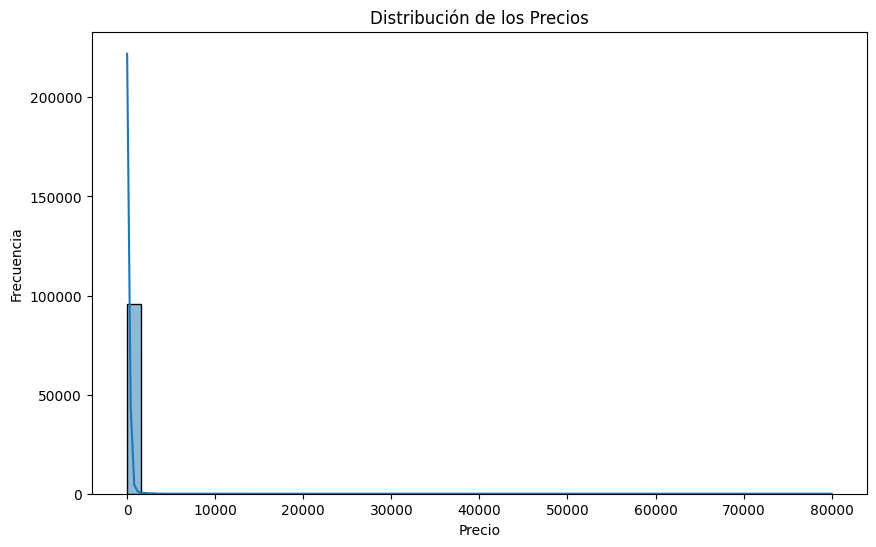

In [19]:
# Histograma de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['price'], bins=50, kde=True)
plt.title('Distribución de los Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


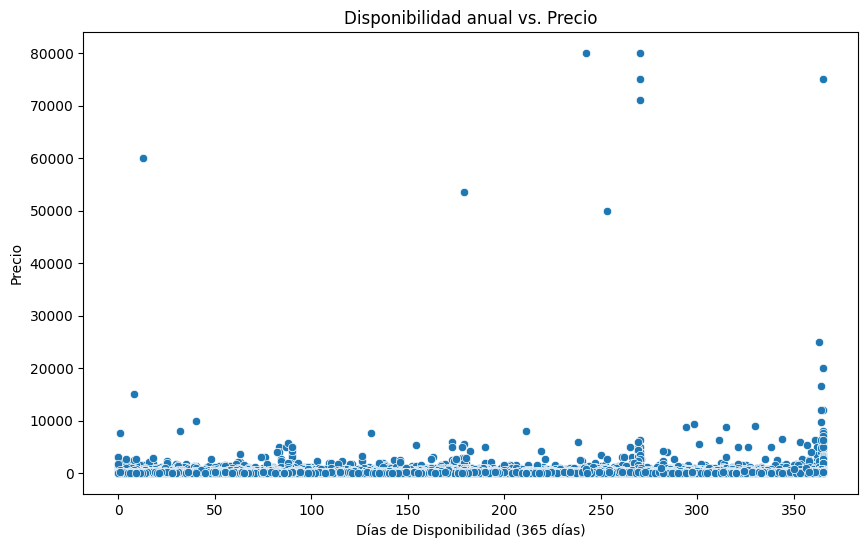

In [20]:
# Diagrama de dispersión de precio vs. disponibilidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=listings_df)
plt.title('Disponibilidad anual vs. Precio')
plt.xlabel('Días de Disponibilidad (365 días)')
plt.ylabel('Precio')
plt.show()


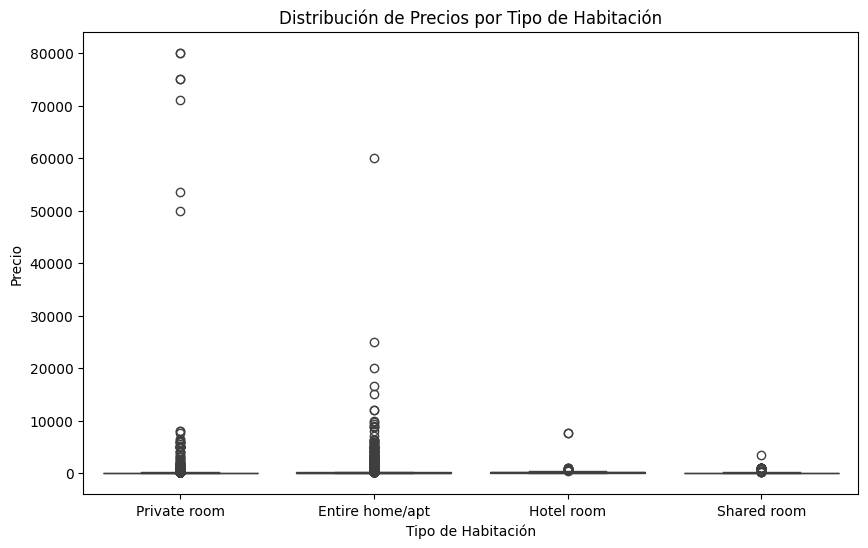

In [21]:
# Diagrama de caja de precios por tipo de habitación
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings_df)
plt.title('Distribución de Precios por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.show()


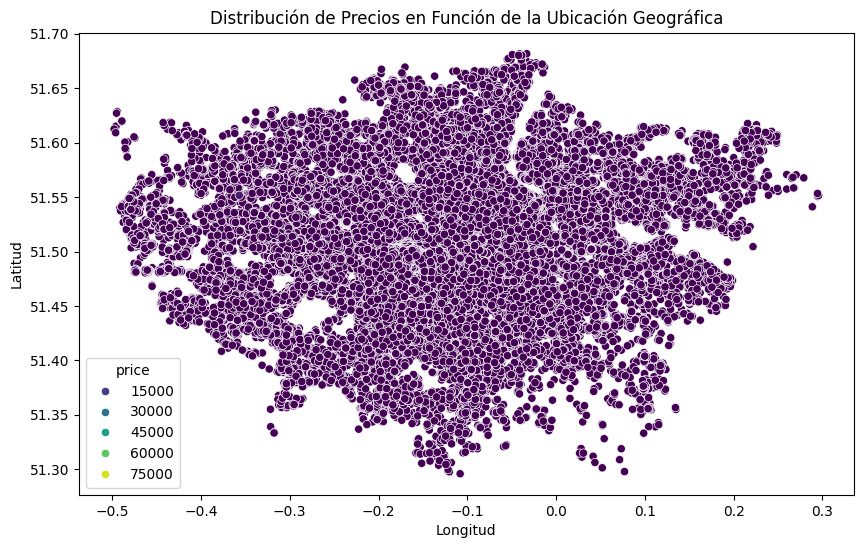

In [22]:
# Diagrama de dispersión de precio en función de la ubicación geográfica
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=listings_df, palette='viridis')
plt.title('Distribución de Precios en Función de la Ubicación Geográfica')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


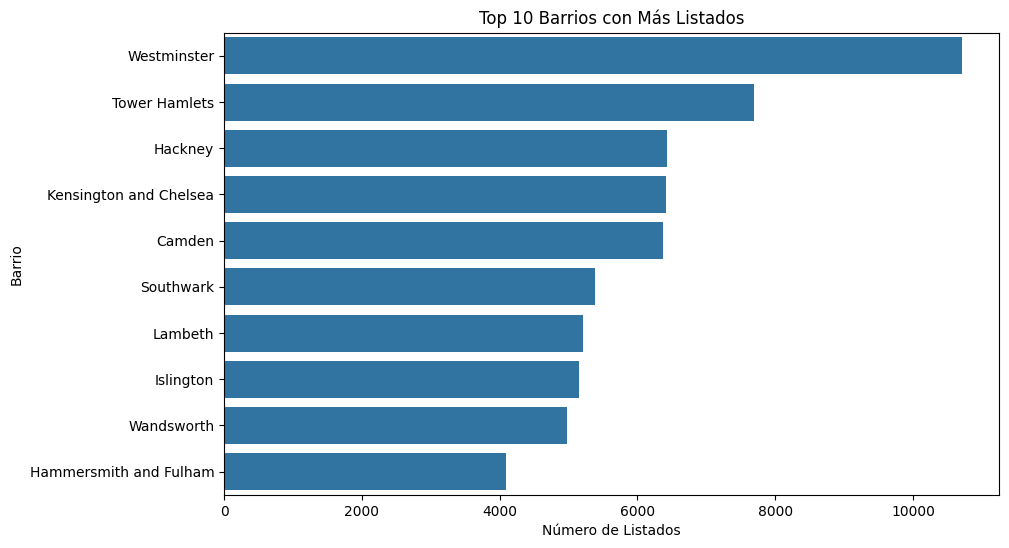

In [23]:
# Top 10 barrios con más listados
top_neighbourhoods = listings_df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index)
plt.title('Top 10 Barrios con Más Listados')
plt.xlabel('Número de Listados')
plt.ylabel('Barrio')
plt.show()


# Prueba de hipotesis

## Comparación del precio medio por tipo de habitación

In [24]:
import scipy.stats as stats

In [25]:
# Eliminar filas con NaN en 'price' o 'room_type' para evitar errores
df_hypothesis = listings_df.dropna(subset=['price', 'room_type'])

# Separar los grupos de precios por tipo de propiedad (room_type)
private_room = df_hypothesis[df_hypothesis['room_type'] == 'Private room']['price']
entire_home = df_hypothesis[df_hypothesis['room_type'] == 'Entire home/apt']['price']
shared_room = df_hypothesis[df_hypothesis['room_type'] == 'Shared room']['price']

# Realizar una prueba ANOVA para comparar los precios entre los diferentes tipos de propiedades
f_stat, p_value = stats.f_oneway(private_room, entire_home, shared_room)

# Mostrar los resultados de la prueba
print(f"Estadístico F: {f_stat}")
print(f"P-valor: {p_value}")

# Evaluación del resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los precios entre los tipos de propiedad.")
else:
    print("No podemos rechazar la hipótesis nula: no hay una diferencia significativa en los precios entre los tipos de propiedad.")


Estadístico F: 176.60006452101072
P-valor: 2.781788206591699e-77
Rechazamos la hipótesis nula: hay una diferencia significativa en los precios entre los tipos de propiedad.


## Prueba de hipótesis por neighbourhoods

In [32]:
# Ejemplo con los barrios de mayor interés
neigh1 = df_hypothesis[df_hypothesis['neighbourhood'] == 'Westminster']['price']
neigh2 = df_hypothesis[df_hypothesis['neighbourhood'] == 'Tower Hamlets']['price']
neigh3 = df_hypothesis[df_hypothesis['neighbourhood'] == 'Hackney']['price']

# Realizar ANOVA para comparar precios entre estos barrios
f_stat, p_value = stats.f_oneway(neigh1, neigh2, neigh3)

print(f"Estadístico F: {f_stat}")
print(f"P-valor: {p_value}")

# Evaluación del resultado
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay diferencias significativas en los precios entre los barrios seleccionados.")
else:
    print("No podemos rechazar la hipótesis nula: no hay diferencias significativas en los precios entre los barrios seleccionados.")


Estadístico F: 530.5929178349595
P-valor: 2.2587311282350027e-226
Rechazamos la hipótesis nula: hay diferencias significativas en los precios entre los barrios seleccionados.
